In [1]:
# This lets us refresh changes from other .py files without having to restart the notebook
%load_ext autoreload 
%autoreload 2

In [2]:
import torch
import torchvision as tv
import torchvision.transforms.v2 as v2

from blocks import *
from utils import validateModelIO, getNormalizedTransform

from trainableModel import TrainingParameters, TrainableModel

from dataLoading import CIFAR10Dataset

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [3]:
from models import doubleBottlev1
model = doubleBottlev1

validateModelIO(ResidualCNN(network=model, printOutsize=False))

Using device: cuda
ResidualCNN(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): DoubleEncodeBottleneckBlock(
      (activation): ReLU()
      (encode1): Sequential(
        (0): Conv2d(64, 16, kernel_size=(1, 1), stride=

tensor([0.3590, 0.3540, 0.3328])
tensor([0.2321, 0.2290, 0.2207])


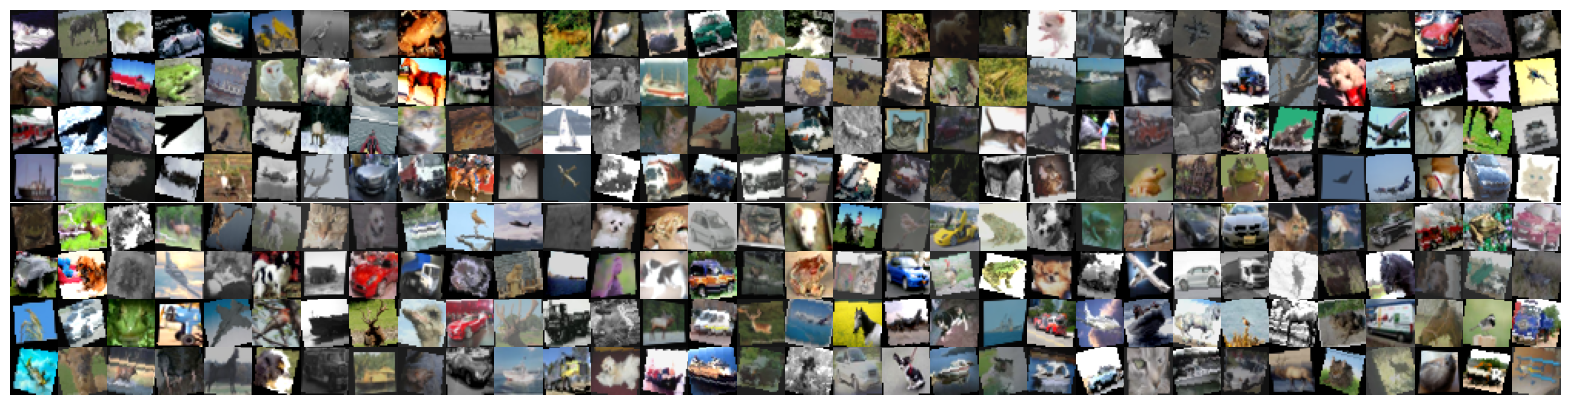

ic| features.size

ship	horse	frog	automobile	ship	truck	bird	automobile	frog	airplane	deer	deer	cat	bird	automobile	dog	dog	truck	frog	dog	bird	dog	automobile	cat	airplane	automobile	frog	cat	airplane	automobile	frog	automobile	
8	7	6	1	8	9	2	1	6	0	4	4	3	2	1	5	5	9	6	5	2	5	1	3	0	1	6	3	0	1	6	1	

(): torch.Size([256, 3, 32, 32])
ic| labels.size(): torch.Size([256])


In [4]:
autoAugmentCIFAR = v2.Compose([
    v2.AutoAugment(v2.AutoAugmentPolicy.CIFAR10),
])

customTransforms = v2.Compose([
    # RandomRangeCrop(),
    v2.RandomPerspective(distortion_scale=0.3, p=0.5),
    v2.RandomGrayscale(),
    v2.RandomRotation(degrees=(0, 15)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ColorJitter(brightness=0.3, contrast=0.5, saturation=0.3),
])


# Create dataset instances
fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=customTransforms)

finalTransform = getNormalizedTransform(fullDataset=fullDataset, customTransforms=customTransforms, showSamples=True)


In [7]:
# Create dataset instances
fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=None)

MODEL_PARAMS_LIST = [
    TrainingParameters(fullDataset=fullDataset, trainTransform=finalTransform, valTestTransform=None, 
                                  trainValTestSplit=[0.8, 0.1, 0.1], epochs=5, warmupEpochs=5, batch_size=2048,
                                  lr=5e-2, momentum=0.8),
]

for run, modelParams in enumerate(MODEL_PARAMS_LIST):

    trainableModel = TrainableModel(f'DoubleBottlev1TEST-{run}', model=model, trainingParameters=modelParams)
    trainableModel.train()

  0%|          | 0/5 [00:00<?, ?it/s]

lr: 0.000000, trainLoss: 2.4657, trainAccuracy: 0.0996, validationLoss: 2.4687, validationAccuracy: 0.0954:   0%|          | 0/5 [00:49<?, ?it/s]


lr: 0.000000, trainLoss: 2.4657, trainAccuracy: 0.0996, validationLoss: 2.4687, validationAccuracy: 0.0954:  20%|██        | 1/5 [01:10<04:40, 70.07s/it]


KeyboardInterrupt: 